In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate dummy function

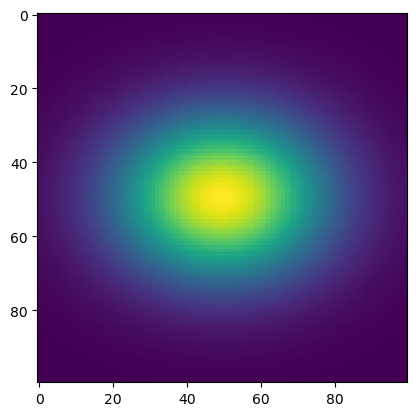

In [2]:
def f(a,b):
    return np.exp(-(0.7*(a-2.5))**2) * np.exp(-(0.9*(b-2.5))**2)

def g(a,b):
    return 10 - np.sqrt(a*a+b*b)

x1 = np.linspace(0, 5, 100)
x2 = np.linspace(0, 5, 100)

X, Y = np.meshgrid(x1, x2)
Z = f(X, Y)

plt.imshow(Z)

# Generate data according to the function

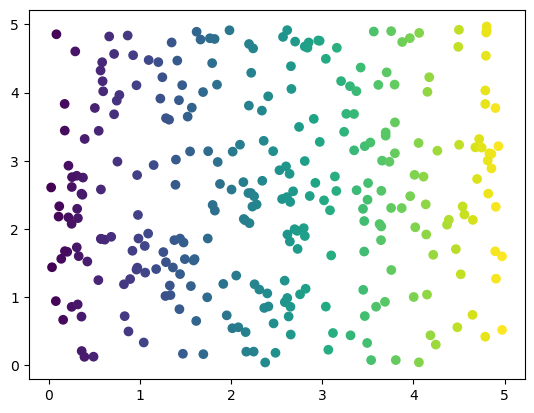

In [7]:
x1 = np.random.random(300) * 5
x2 = np.random.random(300) * 5

# this one is too complex for now
# y = f(x1, x2) # error term?
y = (x1)/10


plt.scatter(x1, x2, c=y);

### Might not be enough datapoints...

# Create perceptron

In [3]:
# activation function and its derivative
def sigm(x):
    return 1/(1+np.exp(-x))

def dsigm(x):
    return np.exp(-x)/(1+np.exp(-x))**2

def relu(x):
    return (x > 0) * x

def drelu(x):
    return (x > 0)

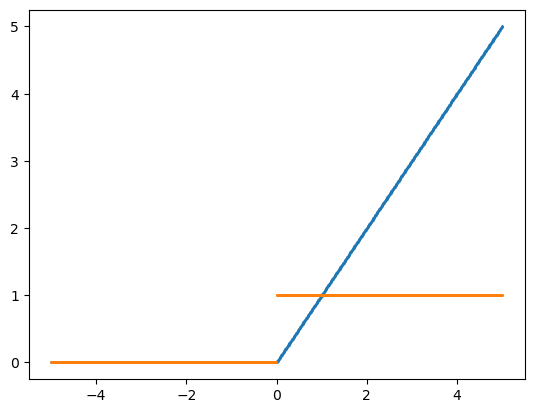

In [4]:
x = np.linspace(-5,5,1000)
plt.scatter(x, relu(x), s=1);
plt.scatter(x, drelu(x), s=1);

In [5]:
class Perceptron:
    """ Simple perceptron for regression. Most things are hardcoded """
    
    def __init__(self):
        # initialize weights
        self.w1, self.w2 = np.random.randn(2)
    
    def eval(self, x1, x2):
        return self._forward_pass(x1, x2)
    
    # fpass for a single point
    def _forward_pass(self, x1, x2, actf=sigm):
        return actf(self.w1 * x1 + self.w2 * x2)

    # derivative of the forward pass
    def _df(self, x1, x2, actf=dsigm):
        return actf(self.w1 * x1 + self.w2 * x2)

    # simple square error
    def loss(self, x1, x2, y_true):
        return np.sum((self._forward_pass(x1, x2) - y_true)**2) 

    # learn over the set (X1,X2, y)
    # iterate over the set and update weights for every forward pass, scaling gradient by lrate
    def learn(self, X1, X2, Y, lrate=0.01):
        for x1, x2, y in zip(X1, X2, Y):
            fpass = self._forward_pass(x1, x2)
            gradient = 2 * (fpass - y) * self._df(x1, x2)
            gradient_w1 = gradient * x1
            gradient_w2 = gradient * x2
            # update weights...
            self.w1 -= lrate * gradient_w1
            self.w2 -= lrate * gradient_w2

Loss before training: 103.11125394732912


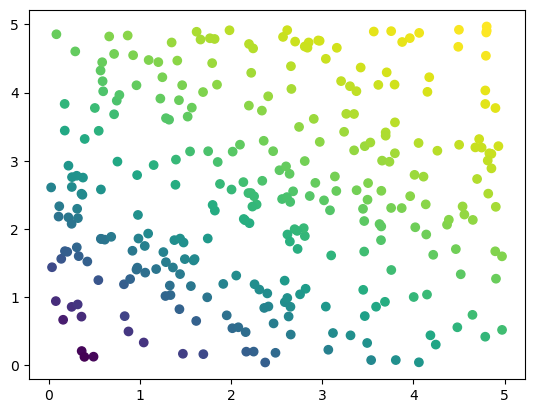

In [8]:
perceptron = Perceptron()

print(f"Loss before training: {perceptron.loss(x1, x2, y)}")
y_pred = perceptron.eval(x1, x2)
plt.scatter(x1, x2, c=y_pred)

Loss now: 10.266808111406187


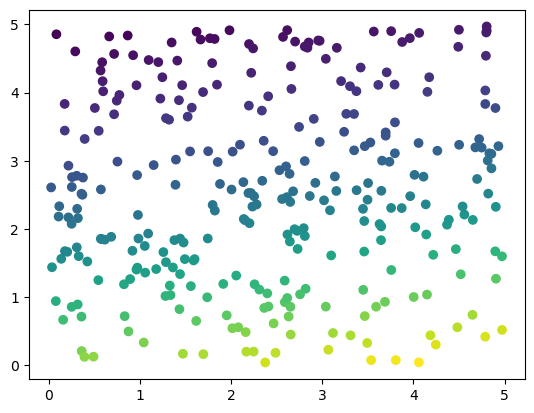

In [9]:
iters = 100
for i in range(iters):
    perceptron.learn(x1, x2, y)
y_pred = perceptron.eval(x1, x2)
plt.scatter(x1, x2, c=y_pred)
print(f"Loss now: {perceptron.loss(x1, x2, y)}")

In [10]:
perceptron.w2

-0.4574797973797078

### Somethings happening...

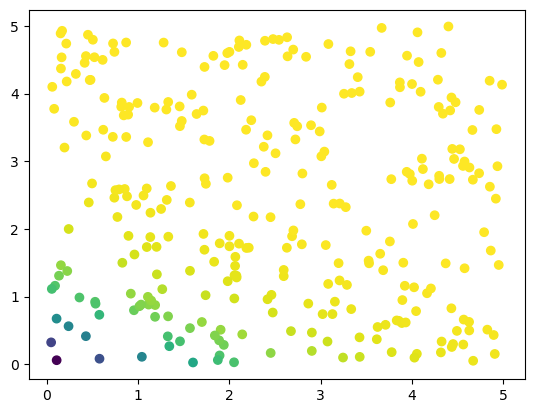

In [153]:
y_pred = perceptron.eval(x1, x2)
plt.scatter(x1, x2, c=y_pred)

In [11]:
class PerceptronRegressor:
    """ Vectorized perceptron for regression. Most things are hardcoded """
    
    def __init__(self, n_inputs, actf, actfd):
        # initialize weights
        self.W = np.random.randn(n_inputs)
        self.actf = actf
        self.actfd = actfd
    
    def eval(self, x):
        return self._forward_pass(x)
    
    # fpass for a single point
    def _forward_pass(self, x):
        return self.actf(np.dot(x, self.W))

    # derivative of the forward pass
    def _df(self, x):
        return self.actfd(np.dot(x, self.W))

    # simple square error
    def loss(self, x, y_true):
        return np.sum((self._forward_pass(x) - y_true)**2) 

    # learn over the set (X1,X2, y)
    # iterate over the set and update weights for every forward pass, scaling gradient by lrate
    def _learn(self, X, Y, lrate=0.01):
        for x, y in zip(X, Y):
            fpass = self._forward_pass(x)
            gradient = 2 * (fpass - y) * self._df(x) * x
#             print(gradient)
            # update weights...
            self.W -= lrate * gradient
        
    def train(self, X, Y, iters=100, lrate=0.01):
        for i in range(iters):
            self._learn(X, Y, lrate)
#             print(f"Step {i}, loss {self.loss(X, Y)}, weights {self.W}")
            

class PerceptronClassifier(PerceptronRegressor):
    def __init__(self, n_inputs):
        super().__init__(n_inputs, sigm, dsigm)
    
    def loss(self, x, y_true):
        y_pred = self._forward_pass(x)
        nll = - y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
        return np.sum(nll)
    
    def _learn(self, X, Y, lrate=0.01):
        for x, y in zip(X, Y):
            y_pred = self._forward_pass(x)
            nll_gradient = -y/y_pred + (1-y)/(1-y_pred)
            gradient = nll_gradient * self._df(x) * x
#             print(gradient)
            self.W -= lrate * gradient

In [12]:
perceptron = PerceptronRegressor(3, relu, drelu)
perceptron.W
X = np.stack([x1, x2, np.ones(x1.shape)], axis=1)
print(perceptron.loss(X, y))

23.36488940814976


# Let's try something simpler - pure linear regression on one x

In [13]:
y = 13.5*x1 + 3.123*x2 + 4.12
X = np.stack([x1, x2, np.ones(x1.shape)],axis=1)

In [14]:
# perc = PerceptronV(3, lambda x: x, lambda x: 1)
perc = PerceptronRegressor(3, relu, drelu)

print(f"Loss before training: {perc.loss(X, y)}")
perc.train(X, y, iters=10)
print(f"Loss after training: {perc.loss(X, y)}")
print(f"Weights after training: {perc.W}")

Loss before training: 712593.5144703125
Loss after training: 1.2575265436619198e-05
Weights after training: [13.50009866  3.1231009   4.11950548]


## ReLU works if coeffs are non-negative

# Works :) good

# Classification + sigmoid act.

## Simplest possible case

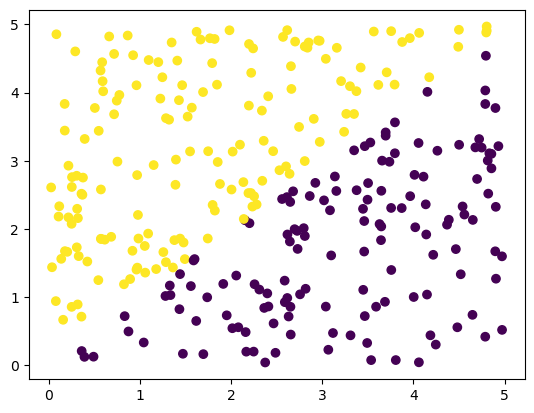

In [16]:
# y_c = ((x1 < 2.5).astype(float) != (x2 < 2.5)).astype(float)
# y_c = (x1 < 2 + x2 < 2).astype(float)
y_c = (x1 < x2).astype(float)
plt.scatter(x1, x2, c=y_c);

In [17]:
perc = PerceptronClassifier(3)

print(f"Loss before training: {perc.loss(X, y_c)}")
perc.train(X, y_c, iters=200)
print(f"Loss after training: {perc.loss(X, y_c)}")
print(f"Weights after training: {perc.W}")

Loss before training: 480.6303840986015
Loss after training: 15.057498892017428
Weights after training: [-6.65414488  6.85837985 -0.47824825]


In [18]:
y_pred = perc.eval(X)

[-6.65414488  6.85837985 -0.47824825]


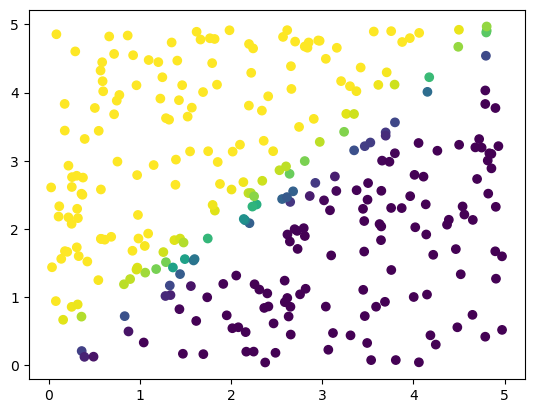

In [19]:
print(perc.W)
plt.scatter(X[:,0], X[:,1], c=y_pred);

# AUC and prediction scores

Datapoints 300, threshold 0.1, acc: 0.9266666666666666, TP: 160, FP: 22, TN: 118, FN: 0
Datapoints 300, threshold 0.3, acc: 0.9766666666666667, TP: 160, FP: 7, TN: 133, FN: 0
Datapoints 300, threshold 0.5, acc: 1.0, TP: 160, FP: 0, TN: 140, FN: 0
Datapoints 300, threshold 0.7, acc: 0.9766666666666667, TP: 153, FP: 0, TN: 140, FN: 7
Datapoints 300, threshold 0.9, acc: 0.9266666666666666, TP: 138, FP: 0, TN: 140, FN: 22


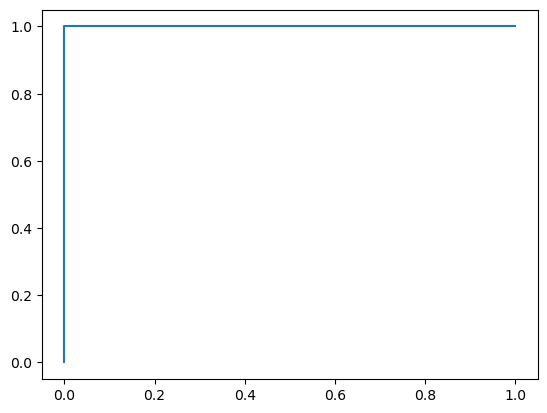

In [20]:
def get_roc_data(y_pred, y_true, res=100):
    y_pred = y_pred.reshape(-1)
    thresh_range = np.linspace(0, 1, res)
    tpr = []
    fpr = []

    for th in thresh_range:
        y_pred_c = (y_pred > th).astype(int)
        tp = np.sum((y_pred_c == 1) & (y_true == 1))
        tn = np.sum((y_pred_c == 0) & (y_true == 0))
        fp = np.sum((y_pred_c == 1) & (y_true == 0))
        fn = np.sum((y_pred_c == 0) & (y_true == 1))
        tpr.append(tp/(tp + fn))
        fpr.append(fp/(fp + tn))
    return tpr, fpr
    
def print_scores(y_pred, y_true, threshold=0.5):
    y_pred = y_pred.reshape(-1)
    y_pred_c = (y_pred > threshold).astype(int)
    tp = np.sum((y_pred_c == 1) & (y_true == 1))
    tn = np.sum((y_pred_c == 0) & (y_true == 0))
    fp = np.sum((y_pred_c == 1) & (y_true == 0))
    fn = np.sum((y_pred_c == 0) & (y_true == 1))
    print(f"Datapoints {len(y_true)}, threshold {th}, acc: {(tp + tn)/(tp + tn + fp + fn)}, TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")


# plot ROC curve
tpr, fpr = get_roc_data(y_pred, y_c)
plt.plot(fpr, tpr);
    
# check some thresholds individually
for th in [0.1, 0.3, 0.5, 0.7, 0.9]:
    print_scores(y_pred, y_c, th)

# Hooray!!!

# Multi-layered version

In [419]:
class MLP:
    _act_f_dict = {
        "SIGMOID": (sigm, dsigm),
        "RELU" : (relu, drelu),
        "NONE": (lambda x: x, lambda x: 1)
    }
    
    _loss_dict = {
        "SIGMOID": (neg_log_loss, neg_log_loss_derivative),
        "RELU": (mse, mse_derivative),
        "NONE": (mse, mse_derivative)
    }
    
    def __init__(self, layer_widths, act_f="SIGMOID"):
        self.actf, self.actfd = self._act_f_dict[act_f] # we assume the same act-f for every layer for now
        self.lossf, self.lossfd = self._loss_dict[act_f]
        n_layers = len(layer_widths) - 1
        self.W = [ np.random.randn(layer_widths[i], layer_widths[i+1]) for i in range(n_layers) ]
        
    # input should be of shape (n_cases, first_layer_width)
    # output is of shape (n_cases, last_layer_width)
    def _forward_pass(self, X, intermediate=False):
        layer_activations = [X]
        layer_outputs = []
        
        layer_input = X
        for w in self.W:
            layer_output = np.matmul(layer_input, w)
            layer_activation = self.actf(layer_output)
            if intermediate:
                layer_outputs.append(layer_output)
                layer_activations.append(layer_activation)
            layer_input = layer_activation
        if intermediate:
            return layer_input, layer_outputs, layer_activations[:-1]
        else:
            return layer_input
        
    def predict(self, X):
        return self._forward_pass(X)
    
    def loss(self, X, y_true):
        return self.lossf(X, y_true)
    
    def lossd(self, y_pred, y_true):
        return self.lossfd(y_pred, y_true)
    
    def neg_log_loss(self, X, y_true):
        y_pred = self._forward_pass(X)
        y_pred = y_pred.reshape(-1)
        nll = - y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
        return np.sum(nll)
    
    def neg_log_loss_derivative(self, y_pred, y_true):
        return np.sum(-Y/y_pred + (1-Y)/(1-y_pred))
    
    def mse(self, X, y_true):
        y_pred = self._forward_pass(X)
        y_pred = y_pred.reshape(-1)
        n_cases = X.shape[0]
        return (y_pred - y_true) ** 2 / n_cases

    def mse_derivative(self, y_pred, y_true):
        n_cases = y_pred.shape[0]
        return 2 * (y_true - y_pred) / n_cases
    
    def train(self, X, Y, iters=100, lrate=0.01):
        for i in range(iters):
            self._learn(X, Y, lrate)
#             print(f"Loss at {i}: {self.loss(X, Y)}")

    def train_batch(self, X, Y, iters=100, lrate=0.01, batch_size=100):
        x_index = 0
        y_index = 0
        Y = Y.reshape(-1, 1)
        for i in range(iters):
            X_batch, x_index = self.get_next_batch(X, x_index, batch_size)
            y_batch, y_index = self.get_next_batch(Y, y_index, batch_size)
            self._learn_batch(X_batch, y_batch, lrate)
            
    def train_stochastic_batch(self, X, Y, iters=100, lrate=0.01, batch_size=100):
        Y = Y.reshape(-1, 1)
        for i in range(iters):
            X_batch = self.get_stochastic_batch(X, batch_size)
            y_batch = self.get_stochastic_batch(Y, batch_size)
            self._learn_batch(X_batch, y_batch, lrate)
    
    def _learn(self, X, Y, lrate=0.01):
        for x, y in zip(X, Y):
            x = x.reshape(1, -1)
            y = y.reshape(1, -1)
            self._learn_batch(self, x, y, lrate)
#             y_pred, layer_outputs, layer_activations = self._forward_pass(x, intermediate=True)
            
#             nll_gradient = -y/y_pred + (1-y)/(1-y_pred)
#             d = nll_gradient * self.actfd(layer_outputs[-1])
            
#             W_grads = []
#             for i in range(len(self.W)-1, -1, -1):
#                 W_grads.append(np.outer(layer_activations[i].T, d))
#                 d = np.matmul(d, self.W[i].T) * self.actfd(layer_outputs[i-1])
                
#             W_grads = W_grads[::-1]
#             self.W = [W - lrate*grad for W, grad in zip(self.W, W_grads)]
            
    def get_next_batch(self, X, index, batch_size):
        n_cases = X.shape[0]
        index_to = min(index + batch_size, n_cases) 
        batch = X[index:index_to,:]
        new_index = index_to % n_cases
        return batch, new_index
    
    def get_stochastic_batch(self, X, batch_size):
        indices = np.random.choice(X.shape[0], batch_size, replace=False)
        return X[indices,:]
    
    # X is (n_cases, n_features), Y is (n_cases, n_outputs)
    # whole dataset is computed at once
    # cost function is negative log-likelihood
    def _learn_batch(self, X, Y, lrate=0.01):
        n_cases = X.shape[0]
        Y = Y.reshape(-1, 1)
        y_pred, layer_outputs, layer_activations = self._forward_pass(X, intermediate=True)

        loss_function_derivative = self.lossfd(y_pred, Y)
        d = nll_deriv * self.actfd(np.sum(layer_outputs[-1], axis=0).reshape(1, -1))

        W_grads = []
        for i in range(len(self.W)-1, -1, -1):
            W_grads.append(np.outer(np.sum(layer_activations[i], axis=0).reshape(1, -1).T, d))
            d = np.matmul(d, self.W[i].T) * self.actfd(np.sum(layer_outputs[i-1], axis=0).reshape(1, -1))
            
        W_grads = W_grads[::-1]
        self.W = [W - lrate*grad for W, grad in zip(self.W, W_grads)]

NameError: name 'self' is not defined

In [384]:
np.random.choice(X.shape[0], 10)

array([630, 521, 637, 516, 839, 134, 686, 286, 587, 786])

# Compare LogReg and NN on a couple of example datasets

In [372]:
x1 = np.random.random(1000)
x2 = np.random.random(1000)
# y = x1**2 - 2*x1 + 3

y = ((x1-0.5)**2 + (x2-0.5)**2 < 0.1).astype(int)
# y = ((x1 > 0.5) != (x2 > 0.5)).astype(int) # xor example
X = np.stack([x1, x2, np.ones(1000)], axis=1)
# Y = (X[:,0] ** 2 + X[:,1] ** 2 < 0.5).astype(int)
# Y = (X[:, 0] > 2*X[:, 1] + 0.3).astype(int)

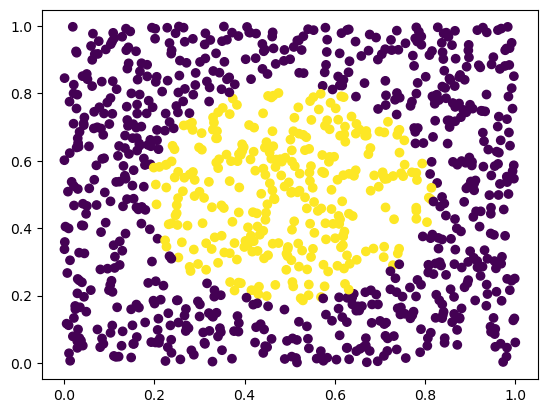

In [373]:
plt.scatter(x1, x2, c=y);

In [415]:
mlp = MLP([3,3,2,1])

In [416]:
print(f"Loss before training: {mlp.loss(X, y)}")
mlp.train(X, y, lrate=0.1, iters=100)
print(f"Loss after training: {mlp.loss(X, y)}")

AttributeError: 'MLP' object has no attribute 'loss'

In [405]:
mlp2 = MLP([3,3,2,1])

In [411]:
print(f"Loss before training: {mlp2.loss(X, y)}")
mlp2.train_stochastic_batch(X, y, lrate=0.01, iters=5000, batch_size=1)
print(f"Loss after training: {mlp2.loss(X, y)}")

Loss before training: 610.9713342706218
Loss after training: 611.1782997054324


In [95]:
y_pred, outputs, activations = mlp2._forward_pass(X, intermediate=True)

In [103]:
print(len(outputs))
outputs[0].shape

3


(1000, 3)

In [160]:
pc = PerceptronClassifier(3)

In [332]:
print(f"Loss before training: {pc.loss(X, y)}")
pc.train(X, y)
print(f"Loss after training: {pc.loss(X, y)}")

Loss before training: 687.5723684633583
Loss after training: 131.4789288903141


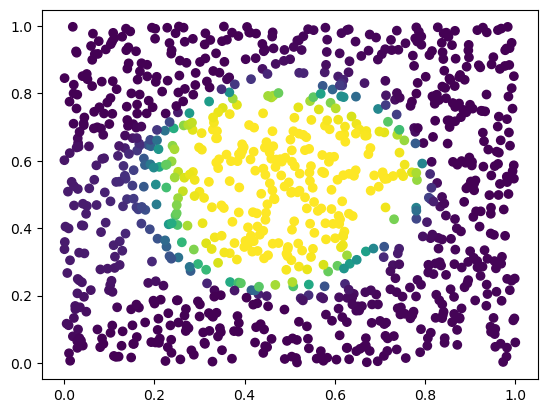

In [404]:
y_pred = mlp.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred);

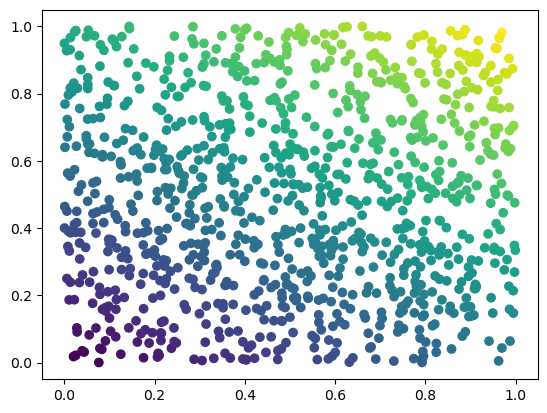

In [114]:
y_pred_pc = pc.eval(X)
plt.scatter(X[:,0], X[:,1], c=y_pred_pc);

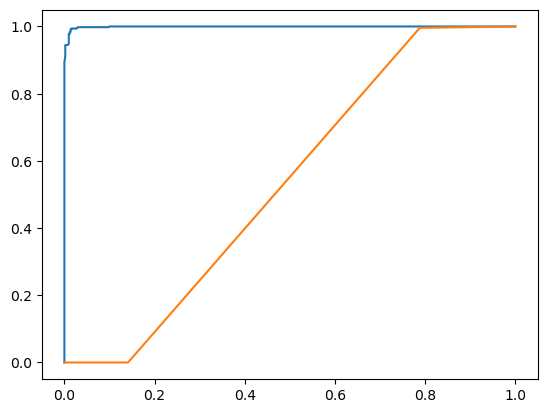

In [162]:
perc_tpr, perc_fpr = get_roc_data(y_pred_pc, y)
nn_tpr, nn_fpr = get_roc_data(y_pred, y)
plt.plot(nn_fpr, nn_tpr);
plt.plot(perc_fpr, perc_tpr);

In [388]:
print("scores for perceptron")
for th in [0.1, 0.3, 0.5, 0.7, 0.9]:
    print_scores(y_pred_pc, y, threshold=th)
print("scores for NN")
for th in [0.1, 0.3, 0.5, 0.7, 0.9]:
    print_scores(y_pred, y, threshold=th)

scores for perceptron
Datapoints 1000, threshold 0.1, acc: 0.3, TP: 300, FP: 700, TN: 0, FN: 0
Datapoints 1000, threshold 0.3, acc: 0.3, TP: 300, FP: 700, TN: 0, FN: 0
Datapoints 1000, threshold 0.5, acc: 0.7, TP: 0, FP: 0, TN: 700, FN: 300
Datapoints 1000, threshold 0.7, acc: 0.7, TP: 0, FP: 0, TN: 700, FN: 300
Datapoints 1000, threshold 0.9, acc: 0.7, TP: 0, FP: 0, TN: 700, FN: 300
scores for NN
Datapoints 1000, threshold 0.1, acc: 0.908, TP: 300, FP: 92, TN: 608, FN: 0
Datapoints 1000, threshold 0.3, acc: 0.959, TP: 287, FP: 28, TN: 672, FN: 13
Datapoints 1000, threshold 0.5, acc: 0.7, TP: 0, FP: 0, TN: 700, FN: 300
Datapoints 1000, threshold 0.7, acc: 0.7, TP: 0, FP: 0, TN: 700, FN: 300
Datapoints 1000, threshold 0.9, acc: 0.7, TP: 0, FP: 0, TN: 700, FN: 300


#  you need 3-3-2-1 network, apparently

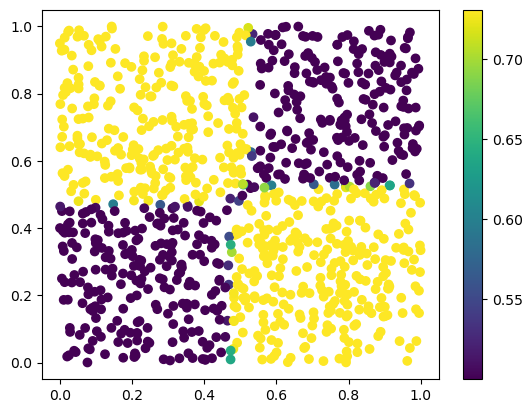

In [117]:
def compute_xor(x1, x2, ones, cutoff=0.5):
    n1 = sigm(50*(x1 - cutoff*ones))
    n2 = sigm(50*(x2 - cutoff*ones))
    n3 = sigm(50*n1 - 50*n2 - 10)
    n4 = sigm(50*n2 - 50*n1 - 10)
    n5 = sigm(n3 + n4)
    return n5

xory = compute_xor(X[:,0], X[:,1], X[:,2])
plt.scatter(X[:,0], X[:,1], c=xory, label=xory);
plt.colorbar();

In [412]:
x1

array([9.22771598e-02, 6.46622092e-01, 5.33827592e-01, 1.02987493e-01,
       7.08226422e-01, 4.88253203e-01, 5.02943440e-01, 9.60707817e-01,
       7.67217237e-01, 2.96823404e-01, 9.95618981e-02, 9.35388285e-01,
       7.70594999e-01, 1.54179199e-01, 8.42971391e-01, 1.79685110e-01,
       6.97096721e-01, 5.51412642e-01, 2.63285945e-01, 6.82295294e-01,
       1.64618493e-01, 8.18263158e-01, 9.56700899e-01, 7.33188381e-01,
       6.18707545e-01, 5.94737211e-01, 8.91163297e-01, 3.94471781e-01,
       7.56977571e-01, 5.42363900e-01, 7.16781349e-01, 2.02606064e-01,
       9.72670563e-01, 5.77189744e-01, 8.87166999e-01, 9.76989491e-01,
       1.67625673e-01, 7.11968282e-01, 8.31246376e-01, 8.46198982e-01,
       4.47479680e-01, 9.22576581e-01, 2.10224566e-01, 8.71108148e-01,
       4.10162705e-01, 6.91585370e-01, 4.35540300e-01, 4.82411506e-01,
       2.00598958e-01, 1.96281868e-01, 8.61165658e-01, 7.09323693e-01,
       6.21029355e-01, 5.10290435e-01, 4.62172738e-01, 3.76594760e-01,
      